In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  9 11:30:06 2025

@author: anteravlic
"""


#Important commands to run the latex/science part of this plot
# pip install SciencePlots

#pip install --upgrade SciencePlots
#sudo apt-get update && sudo apt-get install -y texlive-latex-base

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#plt.style.use('science')


#import matplotlib.pyplot as plt

# Absolute path to the .mplstyle file  (had a lot of issues getting science style to work)
#plt.style.use('/home/codespace/.local/lib/python3.12/site-packages/scienceplots/styles/science.mplstyle')
plt.rcParams['text.usetex'] = False  # Use built-in mathtext instead of full LaTeX

import matplotlib.cm as cm
import matplotlib.colors as mcolors



# Create a truncated colormap (0 to %)
def truncate_colormap(cmap, min_val=0.0, max_val=0.85, n=256):
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{min_val:.2f},{max_val:.2f})',
        cmap(np.linspace(min_val, max_val, n))
    )
    return new_cmap






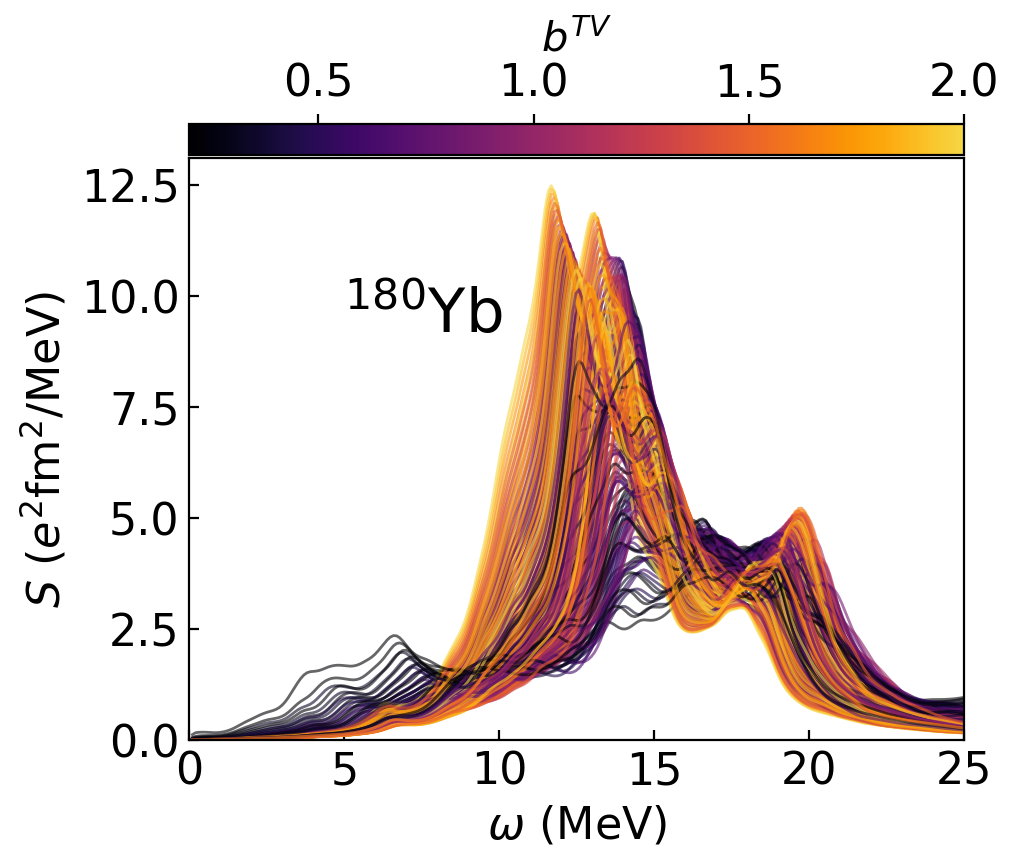

In [2]:
import os, re
import matplotlib.cm as cm
import matplotlib.colors as mcolors


# Create custom layout: 2 rows, 1 column
fig = plt.figure(figsize=(5, 4), dpi=200)
# Update GridSpec with minimal spacing between colorbar and plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[0.05, 0.95], hspace=0.01)

# Create axes
cbar_ax = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

# --- collect selected (alpha, beta) as floats
strength_dir = '../dipoles_data_all/total_strength/'
pattern = re.compile(rf'strength_([0-9.]+)_([0-9.]+)\.out')

selected = []  # list of (alpha, beta)
for fname in os.listdir(strength_dir):
    m = pattern.match(fname)
    if not m:
        continue
    beta_val = m.group(1)
    alpha_val = m.group(2)
    # your selection box:
    #if (0.1 <= float(beta_val) <= 1.9) and (0.2 <= float(alpha_val) <= 1.8):
    selected.append((alpha_val, beta_val))

# If V0 is the first number in filename, it's beta:
v0_values = [float(alpha) for (alpha, beta) in selected]
if not v0_values:
    raise RuntimeError("No files matched selection; check paths/patterns.")

# Colormap & normalization driven by V0
cmap = truncate_colormap(cm.inferno, min_val=0.0, max_val=0.9)
norm = mcolors.Normalize(vmin=min(v0_values), vmax=max(v0_values))

# plotting loop: color each curve by its V0

for alpha_val, beta_val in selected:
    try:
        fn = f'{strength_dir}/strength_{beta_val}_{alpha_val}.out'
        file_strength = np.loadtxt(fn)
        color = cmap(norm(float(alpha_val)))  # <-- V0 color
        ax.plot(file_strength[:,0], file_strength[:,1], alpha=0.6, color=color, lw=1.0)
    except Exception as e:
        print(f"Skipped {beta_val}_{alpha_val} due to error: {e}")



# Add horizontal colorbar on top
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'$b^{TV}$', fontsize=15)
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')

ax.set_ylim(0)
ax.set_xlim(0,25)


ax.set_xlabel(r'$\omega$ (MeV)', size=16)
ax.set_ylabel(r'$S$ ($e^2$fm$^2$/MeV)', size=16)
ax.annotate(r'${}^{180}$Yb', (0.2, 0.7), xycoords='axes fraction', size=22)
ax.tick_params(axis="y", direction="in", which='both', labelsize=16)
ax.tick_params(axis="x", direction="in", which='both', labelsize=16)

#plt.savefig('DipoleNiRainbow.pdf', bbox_inches='tight')

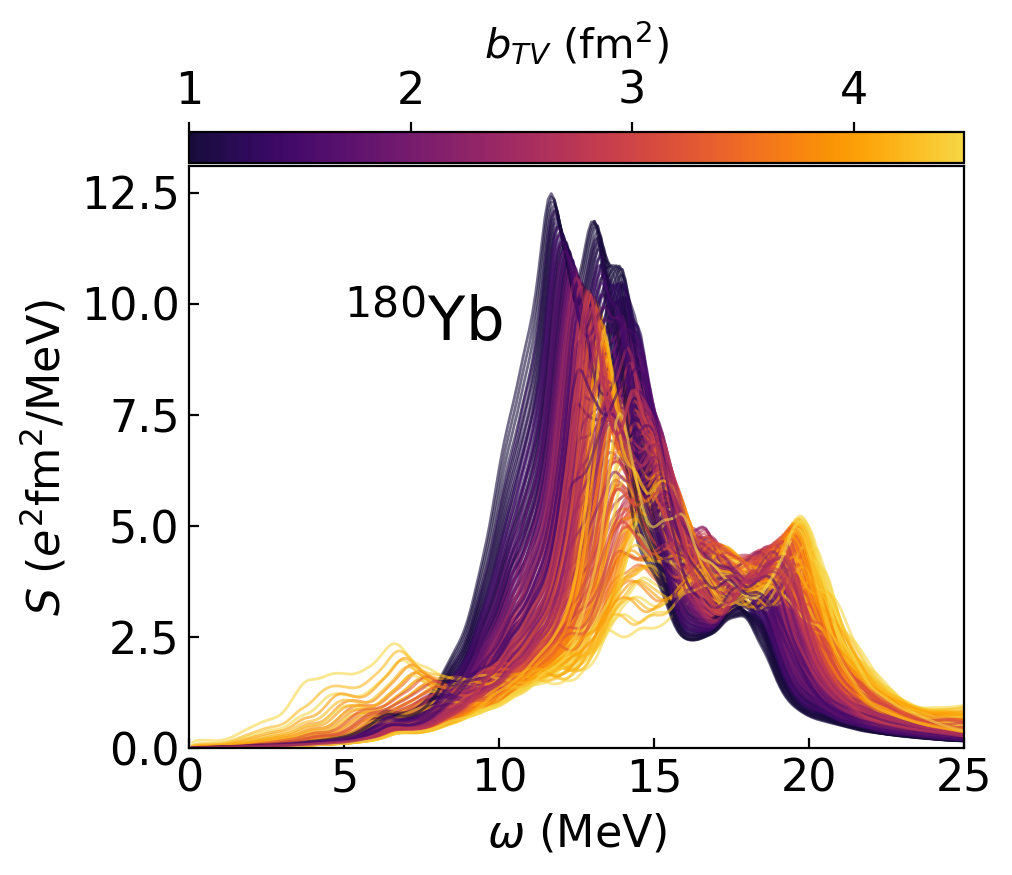

In [3]:
import os, re
import matplotlib.cm as cm
import matplotlib.colors as mcolors


# Create custom layout: 2 rows, 1 column
fig = plt.figure(figsize=(5, 4), dpi=200)
# Update GridSpec with minimal spacing between colorbar and plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[0.05, 0.95], hspace=0.01)

# Create axes
cbar_ax = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

# --- collect selected (alpha, beta) as floats
strength_dir = '../dipoles_data_all/total_strength/'
pattern = re.compile(rf'strength_([0-9.]+)_([0-9.]+)\.out')

selected = []  # list of (alpha, beta)
for fname in os.listdir(strength_dir):
    m = pattern.match(fname)
    if not m:
        continue
    beta_val = m.group(1)
    alpha_val = m.group(2)
    # your selection box:
    #if (0.1 <= float(beta_val) <= 1.9) and (0.2 <= float(alpha_val) <= 1.8):
    selected.append((alpha_val, beta_val))

# If V0 is the first number in filename, it's beta:
v0_values = [float(beta) for (alpha, beta) in selected]
if not v0_values:
    raise RuntimeError("No files matched selection; check paths/patterns.")

# Colormap & normalization driven by V0
cmap = truncate_colormap(cm.inferno, min_val=0.1, max_val=0.9)
norm = mcolors.Normalize(vmin=min(v0_values), vmax=max(v0_values))

# plotting loop: color each curve by its V0

for alpha_val, beta_val in selected:
    try:
        fn = f'{strength_dir}/strength_{beta_val}_{alpha_val}.out'
        file_strength = np.loadtxt(fn)
        color = cmap(norm(float(beta_val)))  # <-- V0 color
        ax.plot(file_strength[:,0], file_strength[:,1], alpha=0.6, color=color, lw=1.0)
    except Exception as e:
        print(f"Skipped {beta_val}_{alpha_val} due to error: {e}")



# Add horizontal colorbar on top
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'$b_{TV}$ (fm${}^2$)', fontsize=15)
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')

ax.set_ylim(0)
ax.set_xlim(0,25)


ax.set_xlabel(r'$\omega$ (MeV)', size=16)
ax.set_ylabel(r'$S$ ($e^2$fm$^2$/MeV)', size=16)
ax.annotate(r'${}^{180}$Yb', (0.2, 0.7), xycoords='axes fraction', size=22)
ax.tick_params(axis="y", direction="in", which='both', labelsize=16)
ax.tick_params(axis="x", direction="in", which='both', labelsize=16)

plt.savefig('YbRainbow.pdf', bbox_inches='tight')